In [2]:
import os
os.chdir('/home/sebastiaan/PhD/Repositories/immune_response_detection/')

import numpy as np
import pandas as pd

from raptcr.hashing import TCRDistEncoder, Cdr3Hasher
from raptcr.constants.datasets import example

from timeit import default_timer as timer



In [2]:
test = example

starttime = timer()
encoder = TCRDistEncoder()
tcrdist_embeddings = encoder.fit_transform(test)
print(f'TCRDist encoding: {np.round(timer()-starttime, 2)} seconds')

starttime = timer()
encoder = Cdr3Hasher(m=128)
raptcr_embeddings = encoder.fit_transform(test)
print(f'RapTCR encoding: {np.round(timer()-starttime, 2)} seconds')


# tcrdist_embeddings = encoder.transform(test)

TCRDist encoding: 2.21 seconds
RapTCR encoding: 2.9 seconds


In [19]:
df = pd.read_csv('./raptcr/datasets/example_repertoire.tsv', sep='\t').sample(50)

encoder = TCRDistEncoder()
tcrdist_embeddings = encoder.fit_transform(df)

gapped_encode_tcr_chains: aa_mds_dim=8
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=272


In [20]:
sequences = (df['v_call'] + '_' + df['junction_aa']).to_list()

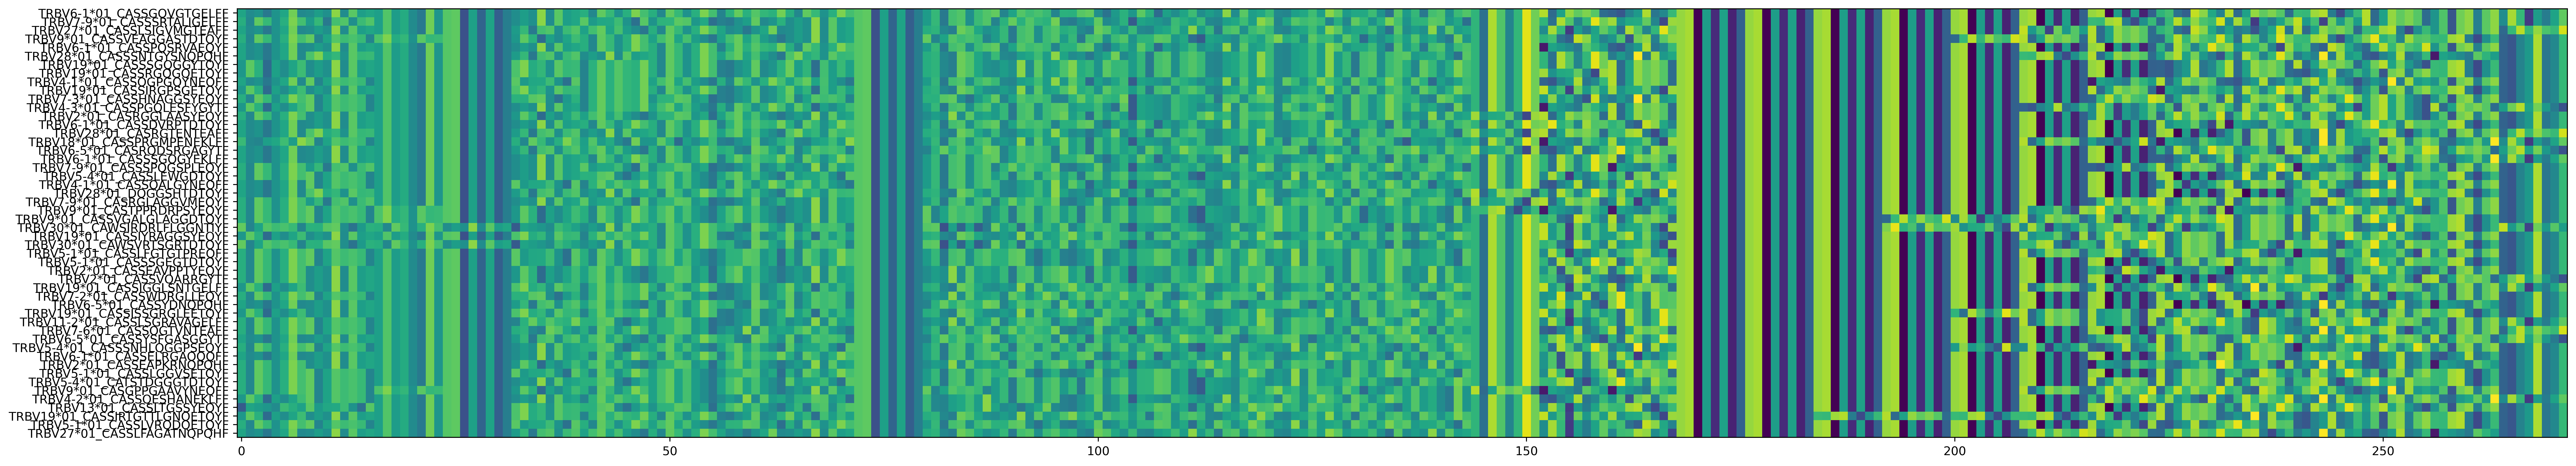

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(dpi=500, figsize=(30,10))

ax.imshow(tcrdist_embeddings)
ax.set_yticks([int(i) for i in np.arange(0,50,1)])
ax.set_yticklabels(sequences)

fig.tight_layout()

In [160]:
from raptcr.constants.preprocessing import setup_gene_cdr_strings

setup_gene_cdr_strings()

6*8 + 7*8 + 5*8

144

In [12]:
df

,v_call,j_call,junction_aa
61420,TRBV28*01,TRBJ1-5*01,CASSSSNQPQHF
165330,TRBV14*01,TRBJ1-4*01,CASSLGQSNEKLFF
55571,TRBV6-6*01,TRBJ2-1*01,CASGPSGRAYYEQFF
68918,TRBV27*01,TRBJ2-2*01,CASSWRYDRTSGWRTGELFF
97172,TRBV28*01,TRBJ2-1*01,CASSWGGLSQGSYNEQFF
...,...,...,...
57133,TRBV28*01,TRBJ2-1*01,CASSSQGALYNEQFF
15420,TRBV30*01,TRBJ2-7*01,CAWSVAYSYEQYF
73604,TRBV27*01,TRBJ2-7*01,CASSYSGQPEQYF
6347,TRBV5-6*01,TRBJ2-1*01,CASSLGTGVWGYNEQFF


In [16]:
df.reset_index(drop=True)

,v_call,j_call,junction_aa
0,TRBV7-9*01,TRBJ2-6*01,CASSSLQGGANVLTF
1,TRBV6-5*01,TRBJ2-1*01,CASRRTGNEQFF
2,TRBV5-1*01,TRBJ1-2*01,CASSLGRQGGGYTF
3,TRBV30*01,TRBJ1-2*01,CAWKGRDRGNYGYTF
4,TRBV30*01,TRBJ2-2*01,CAWRVRGVQGGELFF
...,...,...,...
9995,TRBV25-1*01,TRBJ2-3*01,CASSALADRDGKNTQYF
9996,TRBV19*01,TRBJ2-7*01,CASSISKGSYEQYF
9997,TRBV29-1*01,TRBJ2-5*01,CSARTSGQETQYF
9998,TRBV4-2*01,TRBJ2-6*01,CASSQGVEFPPTGANVLTF


In [4]:
import os
os.chdir('/home/sebastiaan/PhD/Repositories/immune_response_detection/')

import numpy as np
import pandas as pd

from raptcr.hashing import TCRDistEncoder, Cdr3Hasher
from raptcr.indexing import IvfIndex
from raptcr.constants.datasets import example


df = pd.read_csv('./raptcr/datasets/example_repertoire.tsv', sep='\t').sample(100000)
df

hasher = TCRDistEncoder(aa_dim=16, cdr3_weight=3, full_tcr=True)
hasher.fit()
# vecs.shape

idx = IvfIndex(hasher=hasher, n_centroids=1000, n_probe=100)
idx.add(df)


gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544


In [5]:
xq = pd.DataFrame(df.iloc[4588]).T
xq

,v_call,j_call,junction_aa
81123,TRBV4-1*01,TRBJ2-3*01,CASSQLGQSTDTQYF


In [6]:
from raptcr.constants.preprocessing import setup_gene_cdr_strings



# idx.radius_search(pd.DataFrame(df.iloc[9996]).T, r=20)

# xqa = idx.hasher.transform(pd.DataFrame(df.iloc[1]).T).astype(np.float32)
# xqb = hasher.fit_transform(pd.DataFrame(df.iloc[1]).T)

nbrs = idx.radius_search(xq, r=20, exclude_self=False)
nbr_df = pd.DataFrame([i[0].split('_') for i in nbrs], columns=['v_call', 'junction_aa'])

vmap = setup_gene_cdr_strings()
nbr_df['v'] = nbr_df.v_call.map(vmap)

nbr_df['cdr3'] = [hasher._trim_and_gap_cdr3(i) for i in nbr_df.junction_aa]
nbr_df['distance'] = [i[1] for i in nbrs]
nbr_df.sort_values(by='distance')

gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544


,v_call,junction_aa,v,cdr3,distance
0,TRBV4-1*01,CASSQLGQSTDTQYF,MGH-RAYSY-EKLPNSSL,SQL------GQSTDTQ,0.000000
3,TRBV4-1*01,CASSQERQSTDTQYF,MGH-RAYSY-EKLPNSSL,SQE------RQSTDTQ,11.620693
2,TRBV4-1*01,CASSQAGQGTDTQYF,MGH-RAYSY-EKLPNSSL,SQA------GQGTDTQ,12.214769
9,TRBV4-1*01,CASSQEGRSTDTQYF,MGH-RAYSY-EKLPNSSL,SQE------GRSTDTQ,12.401958
10,TRBV4-1*01,CASSQEQQGTDTQYF,MGH-RAYSY-EKLPNSSL,SQE------QQGTDTQ,17.289698
8,TRBV4-1*01,CASSQETASTDTQYF,MGH-RAYSY-EKLPNSSL,SQE------TASTDTQ,17.889303
7,TRBV4-1*01,CASSQGGAGTDTQYF,MGH-RAYSY-EKLPNSSL,SQG------GAGTDTQ,18.217093
6,TRBV4-1*01,CASSQDGGFTDTQYF,MGH-RAYSY-EKLPNSSL,SQD------GGFTDTQ,18.234634
4,TRBV4-1*01,CASSQDGSGTDTQYF,MGH-RAYSY-EKLPNSSL,SQD------GSGTDTQ,18.629139
12,TRBV4-1*01,CASSQEVPSTDTQYF,MGH-RAYSY-EKLPNSSL,SQE------VPSTDTQ,18.755371


In [24]:
for i in df[:10].iterrows():
    print(i[0])

105364
124460
68894
94401
69473
66279
156921
150204
53894
59770


In [19]:
idx.ids

{103748: 'TRBV11-1*01_CASSLLGGKSSYEQYF',
 84274: 'TRBV28*01_CASSSTAEHTDTQYF',
 47523: 'TRBV6-6*01_CASSETRQNPYGYTF',
 159341: 'TRBV11-2*01_CASSPTPLAGGPLNEQYF',
 135806: 'TRBV7-2*01_CASSPFSATEAFF',
 4316: 'TRBV12-5*01_CASGGPGLAGDGSYNEQFF',
 59416: 'TRBV5-1*01_CASSPTIGSHKQFF',
 36005: 'TRBV27*01_CASSLVSTDTQYF',
 93473: 'TRBV19*01_CATETGRGEQYF',
 80583: 'TRBV4-1*01_CASSPTGGTGNQPQHF',
 32837: 'TRBV2*01_CASAGLAGEFAEQFF',
 69638: 'TRBV6-6*01_CASTEAGGPNEQYF',
 134547: 'TRBV28*01_CASSLDFNQPQHF',
 102767: 'TRBV19*01_CASSQPGQKNIQYF',
 82924: 'TRBV29-1*01_CSVEGGSHTEAFF',
 83942: 'TRBV29-1*01_CSVELADSYNEQFF',
 161441: 'TRBV6-5*01_CASSYRGFYYGYTF',
 88128: 'TRBV28*01_CASSSRTVGGYGYTF',
 101613: 'TRBV19*01_CASGQGLDGYTF',
 77676: 'TRBV27*01_CASRPIGTYYNEQFF',
 120616: 'TRBV6-1*01_CASTLSDRATGELFF',
 16429: 'TRBV2*01_CASNMGAGELFF',
 146167: 'TRBV4-3*01_CASSQNIGQTYEQYF',
 116831: 'TRBV28*01_CKHWPQPQHF',
 12110: 'TRBV20-1*01_CSAGVTEAFF',
 52263: 'TRBV7-9*01_CASSGIPSGSLYEQFF',
 34934: 'TRBV28*01_CASTLPLQGAWNT

In [16]:
for i in df[:10].iterrows():
    print(i[0], i[1]['v_call'] + "_" + i[1]['junction_aa'])

103748 TRBV11-1*01_CASSLLGGKSSYEQYF
84274 TRBV28*01_CASSSTAEHTDTQYF
47523 TRBV6-6*01_CASSETRQNPYGYTF
159341 TRBV11-2*01_CASSPTPLAGGPLNEQYF
135806 TRBV7-2*01_CASSPFSATEAFF
4316 TRBV12-5*01_CASGGPGLAGDGSYNEQFF
59416 TRBV5-1*01_CASSPTIGSHKQFF
36005 TRBV27*01_CASSLVSTDTQYF
93473 TRBV19*01_CATETGRGEQYF
80583 TRBV4-1*01_CASSPTGGTGNQPQHF


In [16]:
query = idx.hasher.transform(xq).astype(np.float32)
idx._within_radius(query,10)

gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544


(array([0, 2], dtype=uint64),
 array([9.643732, 0.      ], dtype=float32),
 array([75859, 99910]))

,v_call,junction_aa,v,cdr3
0,TRBV28*01,CASSFSYGYTF,MDH-ENSYD-VKMEKKER,SFS----------YGY
1,TRBV9*01,CASSVPTGELFF,SGD-LSYYN-GEEFPDLH,SVP---------TGEL
2,TRBV6-5*01,CASSYTGDQETQYF,MNH-EYSVG-AGISTTED,SYT-------GDQETQ
3,TRBV15*01,CATSRSGTSGSYNEQFF,LNH-NVYYD-KDFPNTSF,SRS----GTSGSYNEQ
4,TRBV4-3*01,CASSHHSHVLQGPYQPQHF,LGH-NAYSL-EERPNSSH,SHH--SHVLQGPYQPQ
...,...,...,...,...
59,TRBV27*01,CASSGSGIYGYTF,MNH-EYSMN-VEVKEKRN,SGS--------GIYGY
60,TRBV5-6*01,CASSLLRVRDTDTQYF,SGH-DTYYE-EEEFPNYS,SLL-----RVRDTDTQ
61,TRBV27*01,CASSPGTGTRNEQFF,MNH-EYSMN-VEVKEKRN,SPG------TGTRNEQ
62,TRBV5-5*01,CASSLPGAGELFF,SGH-KSYYE-KEEFPNYS,SLP--------GAGEL


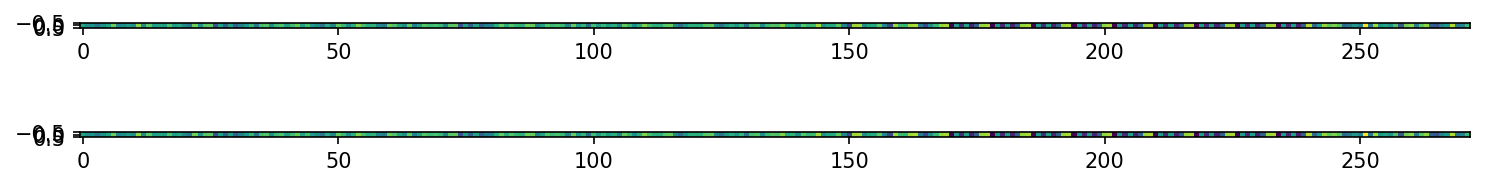

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, dpi=150, figsize=(10,2))
ax[0].imshow(xqa)
ax[1].imshow(xqb)

fig.tight_layout()

In [37]:
for i, x in itterrows(df):
    print(i, x)

0 v_call
1 j_call
2 junction_aa


In [57]:
for i in df[:10].iterrows():
    print(i[1]['v_call'] + "_" + i[1]['junction_aa'])

TRBV7-6*01_CASSSPTGVDTGELFF
TRBV7-9*01_CASSLDSGMVYEQYF
TRBV30*01_CAWSFTVQETQYF
TRBV15*01_CATSPTTGPNTEAFF
TRBV10-3*01_CAISEHTTQGGNEQFF
TRBV18*01_CASSPAGRMGQVIRYNEQFF
TRBV19*01_CASRLGVEKGSGANVLTF
TRBV19*01_CASSIGDRNTEAFF
TRBV5-5*01_CASSGPGQGMHEQFF
TRBV6-1*01_CASSVQGVSNQPQHF


In [32]:
[(encoder._trim_and_gap_cdr3(i),i) for i in test]

[('SSG-----QGVESTEA', 'CASSSGQGVESTEAFF'),
 ('SLY-----TGIAKNIQ', 'CASSLYTGIAKNIQYF'),
 ('SLS-------GAGNTI', 'CASSLSGAGNTIYF'),
 ('SLL------AGPYNEQ', 'CASSLLAGPYNEQFF'),
 ('SLG-----LTGRYNEQ', 'CASSLGLTGRYNEQFF'),
 ('STT--------GGYEQ', 'CASSTTGGYEQYF'),
 ('SPV---AFGGGAGYGY', 'CASSPVAFGGGAGYGYTF'),
 ('SFR------GASENIQ', 'CASSFRGASENIQYF'),
 ('SSS-------DSYYEQ', 'CASSSSDSYYEQYF'),
 ('SLE----VRGGSFREQ', 'CASSLEVRGGSFREQYF')]

In [156]:
n = 10000

def get_vfam(df):
    return df.v_call.apply(lambda x: x.split('*')[0].split('-')[0])

bg = pd.read_csv('./raptcr/datasets/1m_sequences.tsv', sep='\t')
df = bg.loc[:n,:]

df['vfam'] = get_vfam(df)
bg['vfam'] = get_vfam(bg)


/tmp/ipykernel_177307/2172250522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vfam'] = get_vfam(df)


In [141]:
background

,junction,junction_aa,v_call,j_call
717660,TGTGCCAGCAGCTTAATAGACGGTGGGGGGAATACAGACACCTTC,CASSLIDGGGNTDTF,TRBV7-3,TRBJ1-2
22745,TGTGCCTCCATCAGGGCCGGGTCTGAAGCTTTCTTT,CASIRAGSEAFF,TRBV3-1,TRBJ1-1
373265,TGTGCCAGCATAGCGGAATACGAGCAGTACTTC,CASIAEYEQYF,TRBV6-1,TRBJ2-7
664138,TGTGCCAGCAGCAAGCAAGGACAGGCCTACGAGCAGTACTTC,CASSKQGQAYEQYF,TRBV13,TRBJ2-7
225082,TGCGCCAGCAGCCAAGATGGGGGCGACTACAATGAGCAGTTCTTC,CASSQDGGDYNEQFF,TRBV4-1,TRBJ2-1
...,...,...,...,...
37142,TGTGCCAGCAGCTTCCCCAGGGGCAAAGAAAACATTCAGTACTTC,CASSFPRGKENIQYF,TRBV5-6,TRBJ2-4
654385,TGTGCCAGCAGCTTGACGGTAACGGGACAGGGGGCCAACAATGAGC...,CASSLTVTGQGANNEQFF,TRBV5-6,TRBJ2-1
198974,TGCGCCAGCAGCTACGTAAGCACAGATACGCAGTATTTT,CASSYVSTDTQYF,TRBV5-1,TRBJ2-3
367293,TGTGCCAGCAGCCGTGGGGTGAATCAGCCCCAGCATTTT,CASSRGVNQPQHF,TRBV7-6,TRBJ1-5


In [154]:
def get_vfam(df, vcol='v_call'):
    return df[vcol].apply(lambda x: x.split('*')[0].split('-')[0])

def get_jfam(df, jcol='j_call'):
    return df[jcol].apply(lambda x: x.split('*')[0].split('-')[0])

def match_vj_distribution(n, foreground:pd.DataFrame, background:pd.DataFrame=None):
    if background is None:
        background = pd.read_csv('./raptcr/datasets/1m_sequences.tsv', sep='\t')
    else:
        cols = background.columns
        assert 'v_call' in cols and 'j_call' in cols and 'junction_aa' in cols,\
            'background must contain at least the following columns: v_call, j_call, junction_aa'
    
    background['vfam'] = get_vfam(background)
    foreground['vfam'] = get_vfam(foreground)
    background['jfam'] = get_jfam(background)
    foreground['jfam'] = get_jfam(foreground)

    vfreqs = foreground.vfam.value_counts() / n
    jfreqs = foreground.jfam.value_counts() / n

    vfam_counts = dict(np.round(vfreqs * n, 0).astype(int))
    jfam_counts = dict(np.round(jfreqs * n, 0).astype(int))

    vgenes = pd.concat([background[background.vfam==v].v_call.sample(vfam_counts[v]) for v in vfam_counts])
    jgenes = pd.concat([background[background.jfam==j][['j_call','junction_aa']].sample(jfam_counts[j]) for j in jfam_counts])

    return pd.concat([vgenes.reset_index(drop=True), jgenes.reset_index(drop=True)], axis=1)

In [158]:
sample = match_vj_distribution(n=100000, foreground=df)

/tmp/ipykernel_177307/207989167.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreground['vfam'] = get_vfam(foreground)
/tmp/ipykernel_177307/207989167.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreground['jfam'] = get_jfam(foreground)


In [159]:
sample

,v_call,j_call,junction_aa
0,TRBV6-4,TRBJ2-2,CASSKGRTGELFF
1,TRBV6-2,TRBJ2-7,CASRRREYEQYF
2,TRBV6-6,TRBJ2-7,CAQLAGGRGYEQYF
3,TRBV6-5,TRBJ2-5,CASSLVPRQSETQYF
4,TRBV6-1,TRBJ2-1,CASSQDRGGYEQFF
...,...,...,...
9996,TRBV16,TRBJ1-2,CASRGDYGYTF
9997,TRBV16,TRBJ1-3,CASSECVGGNGNTIYF
9998,TRBV16,TRBJ1-5,CASSSQGFGQPQHF
9999,TRBV16,TRBJ1-2,CASSPAQGASNGYTF


In [148]:
sample.junction_aa.str.len().value_counts().sort_index()

7        2
8       16
9       62
10     177
11     380
12     792
13    1246
14    1532
15    1598
16    1405
17    1059
18     750
19     433
20     261
21     159
22      73
23      30
24      18
25       2
26       5
27       1
Name: junction_aa, dtype: int64

In [149]:
sample

,v_call,j_call,junction_aa
0,TRBV6-3,TRBJ2-2,CSATGPFGGELFF
1,TRBV6-1,TRBJ2-5,CASSLGGQKETQYF
2,TRBV6-5,TRBJ2-1,CASSLVGLAGSNEQFF
3,TRBV6-5,TRBJ2-5,CASSQWDREETQYF
4,TRBV6-5,TRBJ2-7,CASSSPVGGYF
...,...,...,...
9996,TRBV16,TRBJ1-2,CASSLSPGQNDYGYTF
9997,TRBV16,TRBJ1-1,CARTWGLARPDTEAFF
9998,TRBV16,TRBJ1-3,CASSLEHGQGARNTIYF
9999,TRBV16,TRBJ1-6,CSARDSPRGHSPLHF


In [117]:
res = []
for v in vfam_counts:
    print(v)
    res.append(bg[bg.vfam==v].v_call.sample(vfam_counts[v])) 

TRBV6
TRBV7
TRBV5
TRBV20
TRBV27
TRBV10
TRBV12
TRBV11
TRBV24
TRBV9
TRBV4
TRBV19
TRBV13
TRBV28
TRBV29
TRBV14
TRBV3
TRBV30
TRBV2
TRBV18
TRBV25
TRBV15
TRBV16


In [1]:
import os
os.chdir('/home/sebastiaan/PhD/Repositories/immune_response_detection/')

import pandas as pd

from raptcr.indexing import IvfIndex
from raptcr.hashing import TCRDistEncoder

In [73]:
pregibon = pd.read_csv('./data/phil/pregibon_tcrs.tsv', sep='\t')

test = pregibon[['peptide','cdr3b','vb']].drop_duplicates()
test = test.rename(columns={'cdr3b':'junction_aa', 'vb':'v_call'})
test = test.reset_index(drop=True)
print(test.shape)
test.head()

(786, 3)


,peptide,junction_aa,v_call
0,CTELKLSDY,CAISESNDGNEQFF,TRBV10-3*01
1,CTELKLSDY,CASTLGTSHDYEQYF,TRBV7-6*01
2,CTELKLSDY,CAISESLGQDQQYF,TRBV10-3*01
3,CTELKLSDY,CAISESRSSGADTQYF,TRBV10-3*01
4,CTELKLSDY,CAISESTGLRDEQFF,TRBV10-3*01


In [74]:
encoder = TCRDistEncoder(aa_dim=16, full_tcr=True).fit(test)
index = IvfIndex(hasher=encoder, n_centroids=1, n_probe=1)
index.add(test)

gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544


In [118]:
def result_to_df(nbrs):
    res = pd.DataFrame([i[0].split('_') for i in nbrs], columns=['v_call', 'junction_aa'])
    res['distance'] = [i[1] for i in nbrs]
    return res.sort_values(by='distance')

def calculate_purity(df, r):
    cutoff = df[df.distance<=r]
    total = cutoff.shape[0]
    top = cutoff.peptide.value_counts()[0]
    purity = top / total
    return purity, total

def radius_range(results_df, mindist=10, maxdist=181, stepsize=5):
    
    radii = np.arange(mindist, maxdist+1, 5)
    purity = []
    ncluster = []
    
    for r in radii:
        try:
            f, n = calculate_purity(results_df, r=r)
        except IndexError:
            f = 0
            n = 0
        purity.append(f)
        ncluster.append(n)

    return pd.DataFrame(
        {'radius':radii,
         'purity':purity,
         'ncluster':ncluster}
    )

In [119]:
allres = []
for i in range(test.shape[0]):
    print(i)
    q = pd.DataFrame(test.loc[i]).T
    res = result_to_df(index.radius_search(q, 200))
    merged = res.merge(test)
    final = radius_range(merged)
    final['tcr_id'] = i
    final['cdr3_length'] = q.junction_aa.str.len()[i]
    allres.append(final)

0
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
1
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
2
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
3
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
4
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
5
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
6
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
7
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
8
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
9
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544
10
gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_

In [120]:
combined = pd.concat(allres)
avg = combined.groupby('radius').mean()
std = combined.groupby('radius').std()

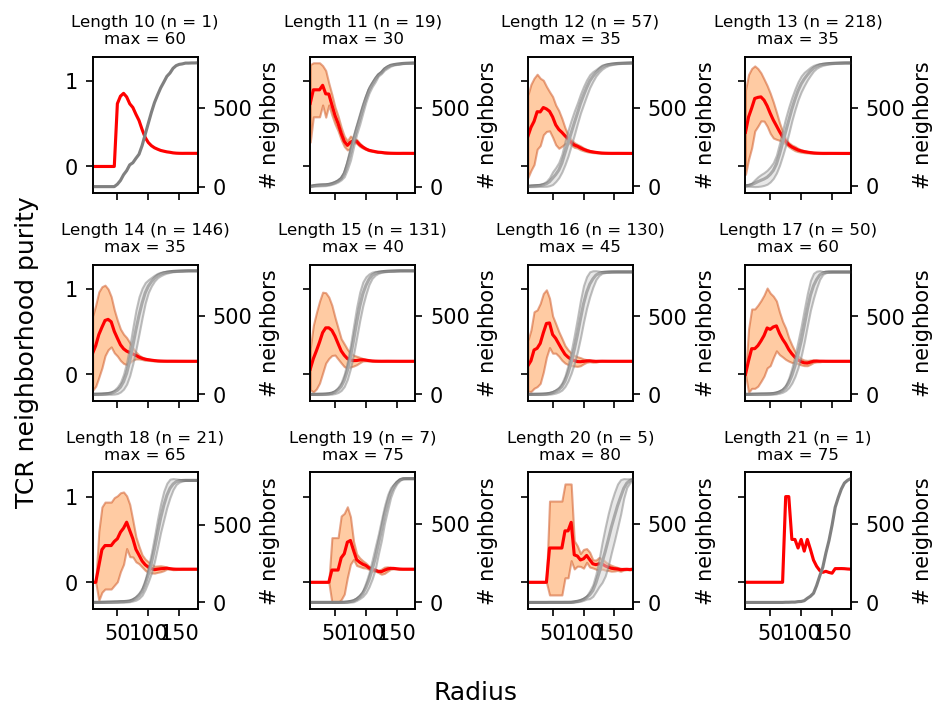

In [181]:
axi = [
    [0,0],[0,1],[0,2],[0,3],
    [1,0],[1,1],[1,2],[1,3],
    [2,0],[2,1],[2,2],[2,3]
    ]

fig, axes = plt.subplots(nrows=3, ncols=4, dpi=150, sharex=True, sharey=True)

lengths = sorted(combined.cdr3_length.unique())
for i, l in zip(axi,lengths):
    
    len_df = combined[combined.cdr3_length==l]
    len_df_avg = len_df.groupby('radius').mean()
    len_df_std = len_df.groupby('radius').std()
    ntcr = len(len_df.tcr_id.unique())

    pmax = np.round(len_df_avg.purity.max(), 2)
    maxid = len_df_avg.purity.idxmax()
    stdmax = np.round(len_df_std.purity[maxid], 2)

    x = len_df_avg.index
    y1 = len_df_avg.purity
    y2 = len_df_avg.ncluster
    error1 = len_df_std.purity
    error2 = len_df_std.ncluster

    axes[i[0],i[1]].fill_between(x, y1-error1, y1+error1, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848', zorder=1)
    axes[i[0],i[1]].plot(x, y1, color='red', zorder=1)
    axes[i[0],i[1]].set_xlim(10,180)
    axes[i[0],i[1]].set_title(f'Length {l} (n = {ntcr})\nmax = {maxid}', fontsize=8)

    # axes[0,0]


    # axes[i[0],i[1]].set_xlabel('Radius')
    # axes[i[0],i[1]].set_supylabel('TCR neighborhood purity')
    # axes[i[0],i[1]].set_title('Effect of radius on purity of TCR neighborhood')

    ax2 = axes[i[0],i[1]].twinx()
    ax2.fill_between(x, y2-error2, y2+error2, alpha=0.5, edgecolor='grey', facecolor='lightgray')
    ax2.plot(x, y2, color='grey', zorder=0)
    ax2.set_ylabel('# neighbors')

    fig.supylabel('TCR neighborhood purity')
    fig.supxlabel('Radius')
    fig.tight_layout()




In [133]:
len_13 = combined[combined.cdr3_length==13]
len_13_avg = len_13.groupby('radius').mean()
len_13_std = len_13.groupby('radius').std()
ntcr = len(len_13.tcr_id.unique())

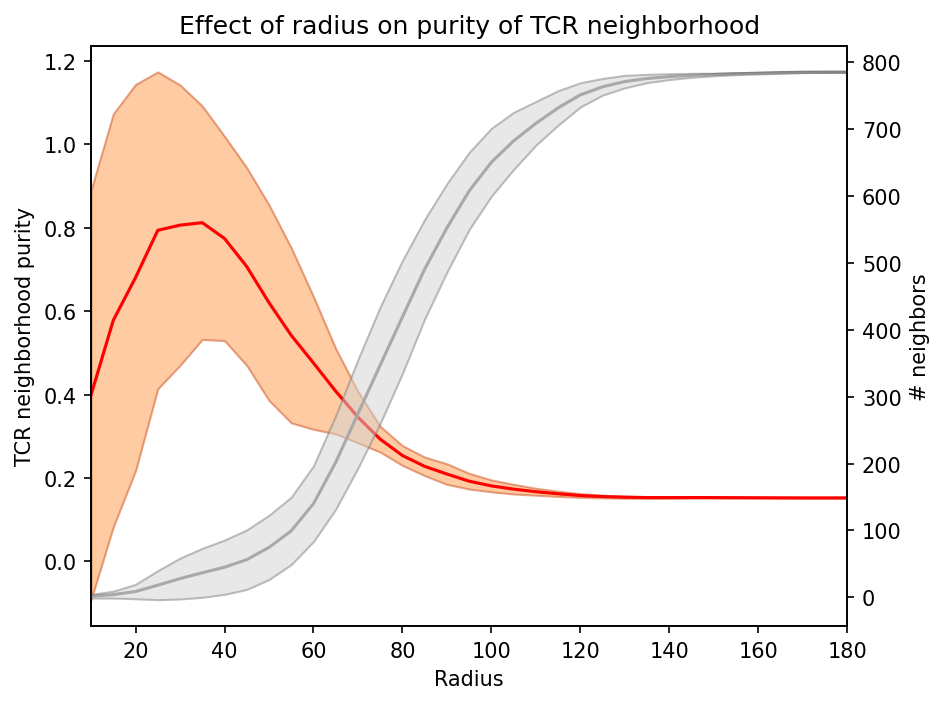

In [135]:
fig, ax1 = plt.subplots(dpi=150)

x = len_13_avg.index
y1 = len_13_avg.purity
y2 = len_13_avg.ncluster
error1 = len_13_std.purity
error2 = len_13_std.ncluster

ax1.fill_between(x, y1-error1, y1+error1, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848', zorder=1)
ax1.plot(x, y1, color='red', zorder=1)
ax1.set_xlim(10,180)
ax1.set_xlabel('Radius')
ax1.set_ylabel('TCR neighborhood purity')
ax1.set_title('Effect of radius on purity of TCR neighborhood')

ax2 = ax1.twinx()
ax2.fill_between(x, y2-error2, y2+error2, alpha=0.5, edgecolor='grey', facecolor='lightgray')
ax2.plot(x, y2, color='grey', zorder=0)
ax2.set_ylabel('# neighbors')

fig.tight_layout()

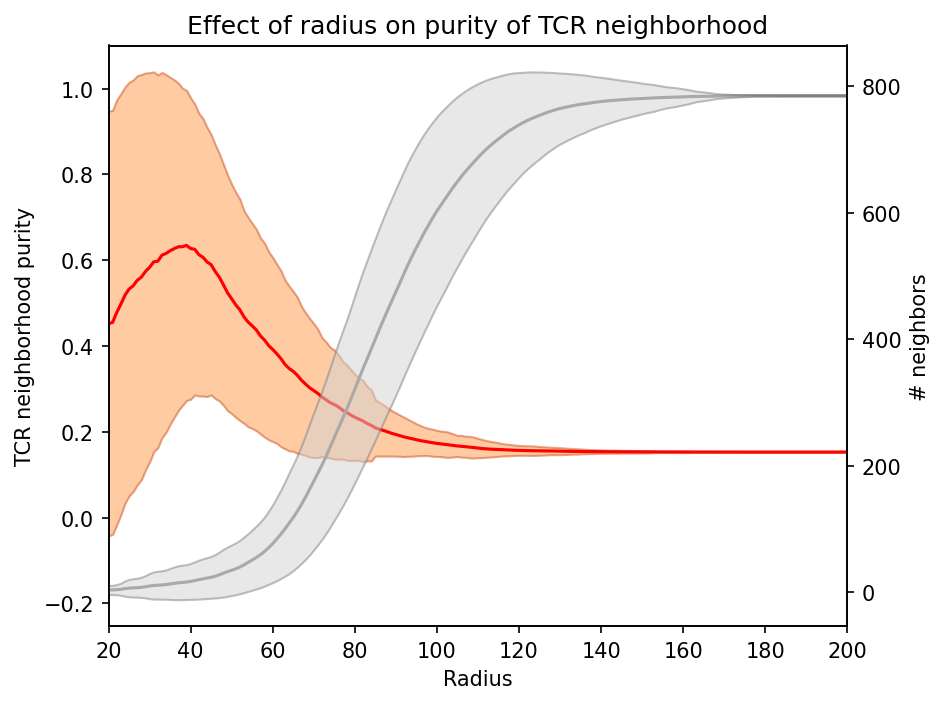

In [112]:
fig, ax1 = plt.subplots(dpi=150)

x = avg.index
y1 = avg.purity
y2 = avg.ncluster
error1 = std.purity
error2 = std.ncluster

ax1.fill_between(x, y1-error1, y1+error1, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848', zorder=1)
ax1.plot(x, y1, color='red', zorder=1)
ax1.set_xlim(20,200)
ax1.set_xlabel('Radius')
ax1.set_ylabel('TCR neighborhood purity')
ax1.set_title('Effect of radius on purity of TCR neighborhood')

ax2 = ax1.twinx()
ax2.fill_between(x, y2-error2, y2+error2, alpha=0.5, edgecolor='grey', facecolor='lightgray')
ax2.plot(x, y2, color='grey', zorder=0)
ax2.set_ylabel('# neighbors')

fig.tight_layout()

In [53]:
query = test[test.junction_aa=='CAISESNDGNEQFF']
res = result_to_df(index.radius_search(query, 200))
final = res.merge(test)

gapped_encode_tcr_chains: aa_mds_dim=16
 num_pos_other_cdrs=18 num_pos_cdr3=16 vec_len=544


,peptide,junction_aa,v_call
0,CTELKLSDY,CAISESNDGNEQFF,TRBV10-3*01


In [54]:
import numpy as np

mindist = final.distance.min()
maxdist = final.distance.max()

radii = np.arange(mindist, maxdist+1, 1)
purity = []
ncluster = []

for r in radii:
    f, n = calculate_purity(final, r=r)
    purity.append(f)
    ncluster.append(n)

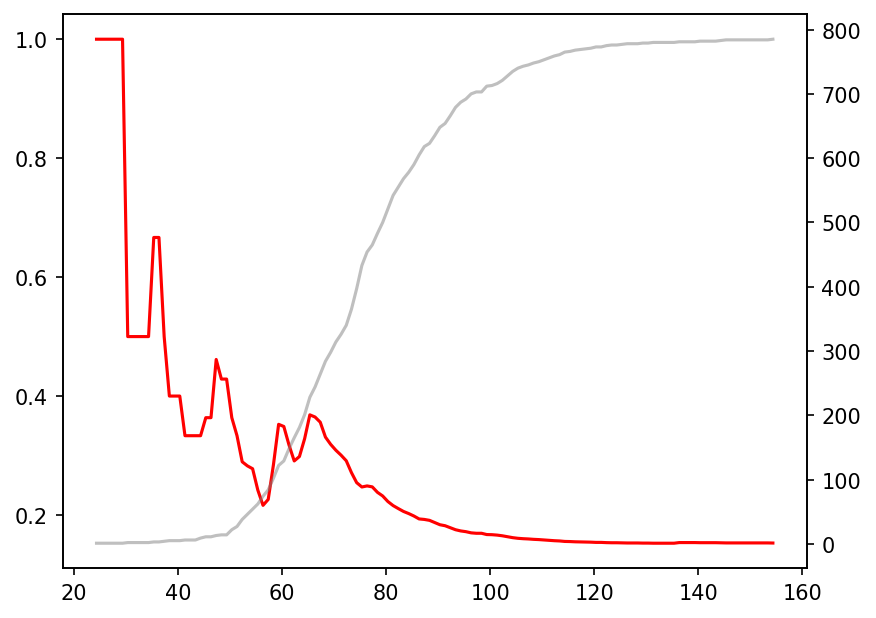

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150)
ax2 = ax.twinx()

ax.plot(radii, purity, color='red')
ax2.plot(radii, ncluster, color='grey', alpha=.5)

ax.set_xlabel()